In [1]:
! pip install textblob
from textblob import TextBlob

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline



In [3]:
tweets = pd.read_csv('musktweets.csv')

In [4]:
tweets

,Unnamed: 0,MESSAGE,date
0,0,"Please ignore prior tweets, as that was someon...",2010-06-04 18:31:57+00:00
1,1,Went to Iceland on Sat to ride bumper cars on ...,2011-12-01 09:55:11+00:00
2,2,I made the volume on the Model S http://ow.ly/...,2011-12-01 10:29:04+00:00
3,3,"Great Voltaire quote, arguably better than Twa...",2011-12-03 08:20:28+00:00
4,4,That was a total non sequitur btw\n26\n14\n50,2011-12-03 08:22:07+00:00
...,...,...,...
31882,4,@AviSchiffmann Neuralink — Elon Musk (@elonmus...,2023-05-23 00:28:30+00:00
31883,3,@Gfilche @neuralink Human output data rate is ...,2023-05-23 00:28:31+00:00
31884,2,@levelsio Good idea — Elon Musk (@elonmusk) [M...,2023-05-23 14:30:43+00:00
31885,1,@Kristennetten It’s pretty wild in the Notes w...,2023-05-23 16:31:35+00:00


In [5]:
# Convert 'MESSAGE' column to string type
tweets['MESSAGE'] = tweets['MESSAGE'].astype(str)

# Calculate sentiment score
tweets['sentiment_score'] = tweets['MESSAGE'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Assign sentiment based on sentiment score
tweets['sentiment'] = tweets['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Display the DataFrame
tweets.head()

,Unnamed: 0,MESSAGE,date,sentiment_score,sentiment
0,0,"Please ignore prior tweets, as that was someon...",2010-06-04 18:31:57+00:00,0.166667,Positive
1,1,Went to Iceland on Sat to ride bumper cars on ...,2011-12-01 09:55:11+00:00,0.600000,Positive
2,2,I made the volume on the Model S http://ow.ly/...,2011-12-01 10:29:04+00:00,0.000000,Neutral
3,3,"Great Voltaire quote, arguably better than Twa...",2011-12-03 08:20:28+00:00,0.450000,Positive
4,4,That was a total non sequitur btw\n26\n14\n50,2011-12-03 08:22:07+00:00,0.000000,Neutral


In [8]:
ax = pd.DataFrame(tweets['sentiment'].value_counts())

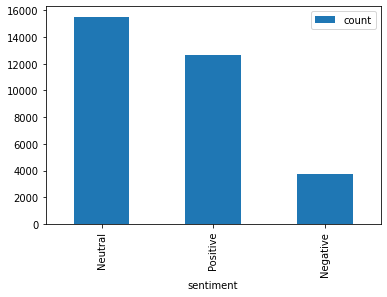

In [12]:
ax.plot.bar()
plt.savefig("sentiment_plot.png", dpi = 600, transparent = True, bbox_inches = 'tight')